In [1]:
import warnings
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

In [2]:
# load the well known karate_club_graph from Networkx
G = nx.karate_club_graph()

In [3]:
# extract features
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

print(f'\nFeatures extracted from {feature_extractor.generation_count} recursive generations:')
print(features)


Features extracted from 3 recursive generations:
    external_edges(mean)(mean)  degree(mean)  degree(sum)  \
0                    19.637500      4.312500         69.0   
1                    22.422685      5.777778         52.0   
2                    25.537083      6.600000         66.0   
3                    23.717361      7.666667         46.0   
4                    17.979167      7.666667         23.0   
5                    17.234375      6.250000         25.0   
6                    17.234375      6.250000         25.0   
7                    26.342708     10.250000         41.0   
8                    27.214363     11.800000         59.0   
9                    28.108824     13.500000         27.0   
10                   17.979167      7.666667         23.0   
11                   24.937500     16.000000         16.0   
12                   25.302083     11.000000         22.0   
13                   26.897696     11.600000         58.0   
14                   29.017157     

In [4]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{0: 'role_3',
 1: 'role_6',
 2: 'role_6',
 3: 'role_6',
 4: 'role_1',
 5: 'role_0',
 6: 'role_0',
 7: 'role_1',
 8: 'role_2',
 9: 'role_1',
 10: 'role_1',
 11: 'role_1',
 12: 'role_1',
 13: 'role_2',
 14: 'role_1',
 15: 'role_1',
 16: 'role_4',
 17: 'role_1',
 18: 'role_1',
 19: 'role_1',
 20: 'role_1',
 21: 'role_1',
 22: 'role_1',
 23: 'role_2',
 24: 'role_4',
 25: 'role_4',
 26: 'role_1',
 27: 'role_2',
 28: 'role_1',
 29: 'role_1',
 30: 'role_1',
 31: 'role_2',
 32: 'role_6',
 33: 'role_3'}

Node role membership by percentage:
    role_0  role_1  role_2  role_3  role_4  role_5  role_6
0     0.10    0.02    0.02    0.42    0.02    0.02    0.42
1     0.12    0.02    0.02    0.02    0.02    0.28    0.52
2     0.09    0.02    0.22    0.02    0.02    0.22    0.41
3     0.12    0.02    0.02    0.02    0.02    0.28    0.52
4     0.17    0.40    0.03    0.17    0.03    0.03    0.17
5     0.27    0.27    0.05    0.27    0.05    0.05    0.05
6     0.27    0.27    0.05

In [5]:
# build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors=len(unique_roles))
# map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in G.nodes]

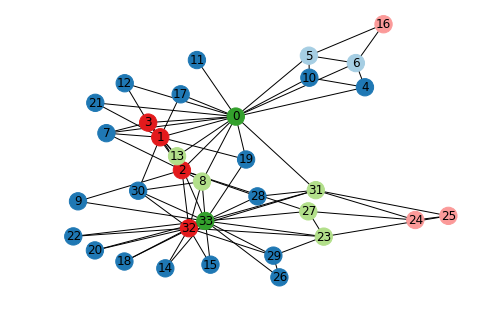

In [6]:
# plot graph
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()